# Lecture 3: Numerical Integration

In [27]:
# some imports we will make at the start of every notebook
# later notebooks may add to this with specific SciPy modules

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Contents

## I         .    Introduction to Numerical Integration 
## II        .    Rule 1: Midpoint Rule a.k.a Rectangle Method
## III       .    Good/Bad Numerical Integration Methods
## IV       .    Rule 2: Trapezoid Rule
## V        .    Error Analysis
## VI       .    Rule 3: Simpson's Rule
## VII      .    Rule 4: Composite Simpson's Rule
## VIII     .    Rule 5: Weddle's Rule
## Aside:    (Richardson) extrapolation, Romberg integration and Newton-Cotes formula

<span style="color:red"> I might end up using interval when I actually intend to say subinterval, sorry .... </span>

## I.   Introduction to Numerical Integration 

Numerical Integration is involves finding the integration of a function. While Sympy can be used to do analytical integration, there are actually many functions for which finding an analytical solution to integration is very difficult, and numerical integration is used instead. 

To understand how to perform numerical integration, we first need to understand what exactly is the purpose of integration. For a 1D function, integration means finding the area underneath the curve. However, integration can also be extended for a 2D function and even a 3D function, and some of these will be covered in your Mathematics modules. 

[*Quadrature*](https://en.wikipedia.org/wiki/Numerical_integration) is the term used for numerical evaluation of a *definite* (i.e. over a range $[a,b]$) integral, or in 1D finding the area under a curve. 

<img src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" style="width: 400px">

*(Wikipedia: https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg)*

Wondered why the symbol of integration looks like that? The symbol of integration actually comes from the cursive of capital letter $S$, meaning summation. But why would it come from the idea of summation? Well, integration is very much related to summation. 

We know that for a 1D function, which will be our primary topic of discussion today, if we evaluate an integral, we find the area under the function, as illustrated in the figure above. If your curve was a straight line (remember, straight lines are but a subset of curves which has no curves), then it would be rather straightforward to calculate the area under the curve, since you would either have a rectangle if your line was a horizontal straight line, or a trapezoid if your line was not a horizontal straight line. Yet, what happens if your line got a bunch of bend and curves? 

For example, we could have an a very simple equation like

$$f(x) = sin(x) +5$$

You probably don't need matplotlib to tell you that this equation is a sinusoidal function. Well, now your shape becomes complicated, and you cannot evaluate the area as easily as you would have done when the line was straight and the area was a rectangle or trapezoid. Therefore, integration comes in to help you find the area. But how does integration actually magically get you the area underneath the curve?

Welll, what integration essentially does is basically breaking the area into smaller and smaller parts, evaluating the area of each part, and then summing each small part together. The small part of the area can be approximated to be a rectangle, a trapezoid, or some other weird shape if you find it suitable.

A very simple example, using rectangles are shown below. 

<img src="https://upload.wikimedia.org/wikipedia/commons/2/28/Riemann_integral_regular.gif" style="width: 400px">


I make the observation from the gif that as each rectangle slice becomes thinner and thinner slices, the summed area from the rectangles become more and more closely fitting to the area under the curve. It should be understable that if the rectangle slice becomes infinitely thin, then the summed area from the rectangle would become so close to the area underneath the curve that the two would be essentially the same. 

It should also be noted that although the example shown uses rectangular slices, it is noted neccesary to use rectangular slices. It is not even neccesasry to use slices that are of the the same width. Even if you used slices with different width, and which are not rectangles, like trapezoids for example, you could still make the slices increasingly thinner so that the summation of the area under the slices becomes closer and closer to the area underneath the curve, until the slices becomes infinitely thin, and the summed area of slices becomes essentially equal to the area under the curve. 

For those of you who adore mathematics, you can find the rigorous mathematics for the above searching Riemann integral on wikipedia. Of course, integration has come a long way since the Riemann integral, and other integrals were developed to deal with the deficiencies with the Riemann integral, but well these are not for now, and for now, let's stick with the Riemann Integral and well, deficiencies, what are those? 

As with previous lectures, the choice of approximation method, as well as the size of the intervals (basically how thick of thin the slices are, but sounding more professional and cool), will control the error.  Better methods as well as smaller (i.e. more to cover our total interval of interest: $[a,b]$) sub-intervals will lead to lower errors, but will generally cost more to compute.

Here the following quadrature methods will be covered in the context of a simple function:

* Midpoint rule (also known as the Rectangle Method)
* Trapezoid rule
* Simpson's rule
* Composite Simpson's rule
* Weddle's rule.

## Integration example


Let's begin with a simple function to demonstrate some of the most basic methods for performing numerical integration:

$$f\left ( x \right ) := \sin \left ( x \right ),$$

and assume that we want to know what the area under the $\,\sin\,$ function between 0 and $\pi$, i.e. $[a,b]=[0,\pi]$.

The indefinite integral (or anti-derivative) of $\,\sin \left ( x \right )\,$ is of course $\,-\cos \left ( x \right )\,$ (plus a constant of integration, $C$, which we can simply ignore as we saw above as it drops out as soon as we perform a *definite* integral).

Since we know the indefinite integral exactly in this case, we can perform the definite integration (i.e. find the area under the curve) ourselves exactly by hand:

$$I :=  \int_{0}^{\pi} \sin \left ( x \right ) = \left [ -\cos\left ( x \right )+ C \right ]_{0}^{\pi} =-\cos\left ( \pi \right ) - (-\cos\left ( 0 \right )) =-\cos\left ( \pi \right ) + \cos\left ( 0 \right ) = -(-1) + 1 = 2.
$$

[We included the constant $C$ here to just to emphasise again the fact that it's present doesn't matter - we can legitimately just not write it down in this type of expression.]

Let's start by plotting the function between these points.

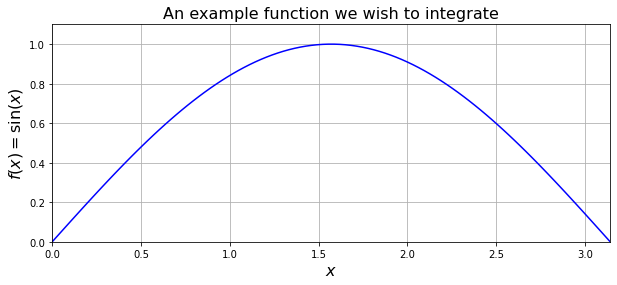

In [2]:
# set up figure
##First we create a figure
##Then we make our plot a subplot of the figure
##Subplots come in handy when you are making multiple plots on a single figure
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot(111)

# Get the value of pi from numpy and generate 100 equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)

# Calculate sin at these points.
y = np.sin(x)

# plot
ax1.plot(x, y, 'b')

# Set x axis limits between 0 and pi.
ax1.set_xlim([0, np.pi])
ax1.set_ylim([0, 1.1])

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)=\sin(x)$', fontsize=16)
ax1.set_title('An example function we wish to integrate', fontsize=16)

# Overlay a grid.
ax1.grid(True);

Now let's investigate the different quadrature rules, finding the area under the curve and seeing how it differs from the true area which we know is 2.

## II.    Rule 1: Midpoint rule a.k.a Rectangle Method

The *midpoint rule* is perhaps the simplest quadrature rule. 

For reasons you will see below it is sometimes also called the *rectangle method*.

Consider one of the subintervals $\,[x_i, x_{i+1}].$

The midpoint rule approximates the integral over this (the $i$-th) subinterval by the area of a rectangle, with a base of length $\,(x_{i+1}-x_i)\,$ and a height given by the value of $\,f(x)\,$ at the midpoint of that interval (i.e. at $\,x=(x_{i+1}+x_i)/2$):

$$ I_M^{(i)} := (x_{i+1}-x_i) \;\; \times \;\; f \left ( \frac {x_{i+1}+x_i} {2} \right ), \;\;\;\;\;\;\text{for}
\;\;\;\;\;\; 0\le i \le n-1.$$

The midpoint estimate of $I$ then simply involves summing up over all the subintervals:

$$I_M := \sum_{i=0}^{n-1} \, f \left ( \frac {x_{i+1}+x_i} {2} \right )\, (x_{i+1}-x_i).$$



Ok, so basically, what the midpoint rule does is rather simple. 

1. So you have a curve, and you have an interval of the curve for which you want to calculate the area underneath that interval. You will divide that interval of the curve into smaller pieces, and each small piece will be called a subinterval. 


2. We assume that your interval begins at $x_0$ and ends at $x_n$. We can pick a random subinterval $[x_i,x_{i+1}]$ where $0\le i \le n-1$. For example, your 1st interval will be $[x_0,x_1]$ and your $i=0$, and your last interval will be $[x_{n-1},x_n]$ and your $i=n-1$. 


3. For every subinterval, we approxiamte the slice to be a rectangle. To find the area of the rectangle we need to find the width and the height. The width of the rectangle is simply the width of the subinterval. The height of the rectangle can be estimated as the value of the function at the midpoint of the subinterval, so $f \left ( \frac {x_{i+1}+x_i} {2} \right )$.  To find the area we simply multiply the width of the rectangle by the height of the rectangle. 

$$Width \;\; of \;\; Rectangle = x_{i+1} - x_i$$

$$Height \;\; of \;\; Rectangle = f \left ( \frac {x_{i+1}+x_i} {2} \right ) $$

$$Area \;\; of \;\; Rectangle = (x_{i+1} - x_i) f \left ( \frac {x_{i+1}+x_i} {2} \right )$$

Generalizing the above for all slices, where $I_M^{(i)}$ is simpley the area of the subinterval $[x_i,x_{i+1}]$. $M$ subscript here denotes the use of the Midpoint Method 

$$ I_M^{(i)} := (x_{i+1}-x_i) \;\; \times \;\; f \left ( \frac {x_{i+1}+x_i} {2} \right ), \;\;\;\;\;\;\text{for}
\;\;\;\;\;\; 0\le i \le n-1.$$

4. To find the area under the curve, we need to sum up all of the areas from the subinterval, so we are going to use the summation symbol. We knoe that the subinterval index goes from the first subinterval where $i=0$ to the last subinterval where $i=n-1$, thus we arrive at

$$I_M := \sum_{i=0}^{n-1} \, f \left ( \frac {x_{i+1}+x_i} {2} \right )\, (x_{i+1}-x_i).$$

Note that we dropped $i$ prefix from $I$ because now it is the whole area under the curve, not just the area from one subinterval. 

Let's write some code to plot the idea as well as compute an estimate of the integral using the midpoint rule.

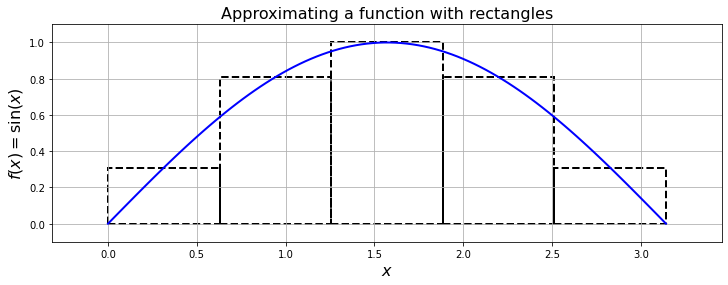

The sum of the areas of the rectangles is (I_M): 2.033281476926


In [3]:
# this is a matplotlib function that allows us to easily plot rectangles
# which will be useful for visualising what the midpoint rule does
from matplotlib.patches import Rectangle


def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)=\sin(x)$', fontsize=16)
ax1.set_title('Approximating a function with rectangles', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)
I_M = 0.0
for i in range(number_intervals):
    ax1.add_patch(Rectangle((xi[i], 0.0), (xi[i+1] - xi[i]),
                            f((xi[i+1]+xi[i])/2), fill=False, ls='--', color='k', lw=2))
    I_M += f((xi[i+1]+xi[i])/2)*(xi[i+1] - xi[i])

# use an explicit show here to force the figure to appear before the following print.
plt.show()
print('The sum of the areas of the rectangles is (I_M): {:.12f}'.format(I_M))

A complex example looks like this, where the red line shows the original function we wish to compute the integral of, and the blue rectangles *approximate* the area under that function for a number of sub-intervals:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Integration_rectangle.svg/340px-Integration_rectangle.svg.png" width="600">

## Implementing a midpoint rule function

Clearly the sum of the areas of all the rectangles provides an estimate of the true integral. In the case above we observe an error of around 1.5%.

[Note that the SciPy module features many different integration functions, and you can find thorough documentation for these functions (including methods not covered in this course) [here](http://docs.scipy.org/doc/scipy/reference/integrate.html). This library does not contain a function for the midpoint rule, but it is trivial to create our own.]

As we are going to compare different rules below, let's implement a midpoint rule function.

In [5]:
def midpoint_rule(a, b, function, number_intervals=10):
    """ Our implementation of the midpoint quadrature rule.
    
    a and b are the end points for our interval of interest.
    
    'function' is the function of x \in [a,b] which we can evaluate as needed.
    
    number_intervals is the number of subintervals/bins we split [a,b] into.
    
    Returns the integral of function(x) over [a,b].
    """
    interval_size = (b - a)/number_intervals

    # Some examples of some asserts which might be useful here - 
    # you should get into the habit of using these sorts of checks as much as is possible/sensible.
    assert interval_size > 0
    assert type(number_intervals) == int
    
    # Initialise to zero the variable that will contain the cumulative sum of all the areas
    I_M = 0.0
    
    # Find the first midpoint -- i.e. the centre point of the base of the first rectangle
    mid = a + (interval_size/2.0)
    # and loop until we get past b, creating and summing the area of each rectangle
    while (mid < b):
        # Find the area of the current rectangle and add it to the running total
        # this involves an evaluation of the function at the subinterval midpoint
        I_M += interval_size * function(mid)
        # Move the midpoint up to the next centre of the interval
        mid += interval_size

    # Return our running total result
    return I_M

# check the function runs and agrees with our first version used to generate the schematic plot of the method above:
print('midpoint_rule(0, np.pi, np.sin, number_intervals=5) = ', midpoint_rule(0, np.pi, np.sin, number_intervals=5))

midpoint_rule(0, np.pi, np.sin, number_intervals=5) =  2.033281476926104


In [6]:
# Now let's test the midpoint function. 
print("The exact area found by direct integration = 2")
for i in (1, 2, 10, 100, 1000):
    area = midpoint_rule(0, np.pi, np.sin, i)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2)))

The exact area found by direct integration = 2
Area 1 rectangle(s) = 3.14159 (error=1.14159)
Area 2 rectangle(s) = 2.22144 (error=0.221441)
Area 10 rectangle(s) = 2.00825 (error=0.00824841)
Area 100 rectangle(s) = 2.00008 (error=8.22491e-05)
Area 1000 rectangle(s) = 2 (error=8.22467e-07)


## <span style="color:blue">Exercise 3.1: Midpoint rule convergence plot</span>

Plot the log-log plot mentioned below.

We can observe from the slope of the log-log plot of error against number of subintervals that the error is a quadratic function of the inverse of the number of subintervals (or equivalently is quadratically dependent on the spacing between the points - the interval size). 

This demonstrates that (for this particular example at least), the method demonstrates second-order accuracy - if we halve the interval size the error goes down by a factor of 4!


The simplicity of this method is its weakness, as rectangles (i.e. a flat top) are rarely a good approximation for the shape of a smooth function. 

## III. Good/Bad Numerical Integration Methods

We observe that for the rectangle method, if the subintervals are large, then the method becomes inaccurate. We also observe that if the subintervals become smaller and smaller, then the area calculated becomes closer and closer to the exact area under the curve. We also note that to have small intervals, we need to evaluate the function at more and more points. I see that for 5 subintervals, we will need to evaluate 6 points in total. 

In numerical integration, given an $\infty$ number of points, and thus an $\infty$ Note:$(\infty - 1 = \infty )$ number of subintervals, any numerical integration method will result in the area summed from the subinterval becoming closer and closer to the area under the curve. 

However, it should be noted that computational power is not infinite. While the examples here demonstrated can easily be calculated, real world examples are often very complex, and significant computational power may be required to compute even just a single point. Yet to get an accurate calculation of the area under the curve, we need more and more points, for more and more subintervals. Thus, we reach a conflict. To have a more accurate area under the curve, we need more points, but getting more points requires more computational power, which is often limited. 

Thus, a good numerical integration method must be able to be both accurate in finding the area underneath even if only a few points can be calculated. 



## IV.     Rule 2: Trapezoid rule

As previously stated, the slices we use do not have to be rectangles, they can also be trapezoids. Rectangle rule is very similar to the trapezoid rule except for one small difference. 

For the height of the rectangle, the rectangle rule, the width of the subinterval is multiplied by 

$$f(\frac{x_i + x{i+1}}{2})$$

while for the trapezoid rule, the width of the subinterval will instead by multiplied by 

$$\frac{f(x_i) + f(x_{i+1})}{2}$$

Oh, and we will also change the subscript. For the midpoint rule, a.k.a the rectangle rule, the subscript was $M$, while for the trapezoid rule, the subscipt will accordingly be $T$. Do write down both methods on pen and paper, side by side, and it should be plainly obvious their similarities and differences. 

If we change the shape of the rectangle to a trapezoid (i.e. the top of the shape now being a linear line fit defined by the values of the function at the two end points of the subinterval, rather than the constant value used in the midpoint rule), we arrive at the trapezoid, or trapezoidal, rule. 

The trapezoid rule approximates the integral by the area of a trapezoid with base $(x_{i+1}-x_i)$ and the left- and right-hand-sides equal to the values of the function at the two end points.  

In this case the area of the shape approximating the integral over one subinterval, is given by:

$$I_T^{(i)} := (x_{i+1}-x_i) \;\; \times \;\; 
\left( \frac {f\left ( x_{i+1}\right ) + f \left (x_{i} \right )} {2} \right)
\;\;\;\;\;\;\text{for}
\;\;\;\;\;\; 0\le i \le n-1.$$

The trapezoidal estimate of $I$ then simply involves summing up over all the subintervals:

$$I_T := \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i). $$

Ok, so basically, what the trapezoid rule does is rather simple. 

1. So you have a curve, and you have an interval of the curve for which you want to calculate the area underneath that interval. You will divide that interval of the curve into smaller pieces, and each small piece will be called a subinterval. 


2. We assume that your interval begins at $x_0$ and ends at $x_n$. We can pick a random subinterval $[x_i,x_{i+1}]$ where $0\le i \le n-1$. For example, your 1st interval will be $[x_0,x_1]$ and your $i=0$, and your last interval will be $[x_{n-1},x_n]$ and your $i=n-1$. 


3. For every subinterval, we approxiamte the slice to be a trapezoid. To find the area of the trapezoid we need to find the width and the average between the two bases. The width of the rectangle is simply the width of the subinterval. The average of the two bases of the trapezoid can be estimated as the average between the value of the function at $(x_i)$ and $(x_{i+1})$,so $ \left ( \frac {f(x_{i+1})+f(x_i)} {2} \right )$.  To find the area we simply multiply the width of the rectangle by the height of the rectangle. 

$$Width \;\; of \;\; Rectangle = x_{i+1} - x_i$$

$$Height \;\; of \;\; Rectangle = \left( \frac {f\left ( x_{i+1}\right ) + f \left (x_{i} \right )} {2} \right) $$

$$Area \;\; of \;\; Rectangle = (x_{i+1} - x_i) \left( \frac {f\left ( x_{i+1}\right ) + f \left (x_{i} \right )} {2} \right)$$

Generalizing the above for all slices, where $I_T^{(i)}$ is simpley the area of the subinterval $[x_i,x_{i+1}]$. $T$ subscript here denotes the use of the Trapzoid Method 

$$ I_T^{(i)} := (x_{i+1}-x_i) \;\; \times \;\; \left( \frac {f\left ( x_{i+1}\right ) + f \left (x_{i} \right )} {2} \right) , \;\;\;\;\;\;\text{for}
\;\;\;\;\;\; 0\le i \le n-1.$$

4. To find the area under the curve, we need to sum up all of the areas from the subinterval, so we are going to use the summation symbol. We know that the subinterval index goes from the first subinterval where $i=0$ to the last subinterval where $i=n-1$, thus we arrive at

$$I_T := \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i). $$

Note that we dropped $i$ prefix from $I$ because now it is the whole area under the curve, not just the area from one subinterval. 

Let's write some code to plot the idea and compute an estimate of the integral.

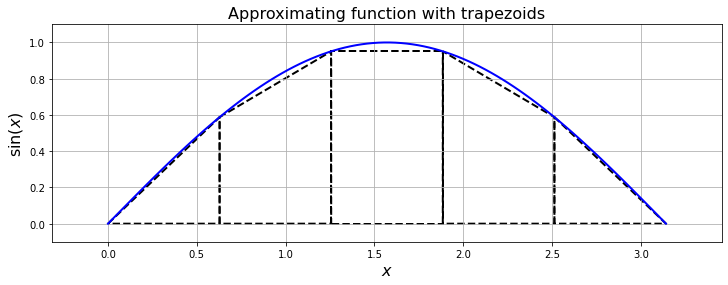

The sum of the areas of the trapezoids is (I_T): 1.933765598093


In [18]:
# this is a matplotlib function that allows us to plot polygons
from matplotlib.patches import Polygon


def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$\sin(x)$', fontsize=16)
ax1.set_title('Approximating function with trapezoids', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)
I_T = 0.0
for i in range(number_intervals):
    ax1.add_patch(Polygon(np.array([[xi[i], 0], [xi[i], f(xi[i])], [
                  xi[i+1], f(xi[i+1])], [xi[i+1], 0]]), closed=True, fill=False, ls='--', color='k', lw=2))
    I_T += ((f(xi[i+1]) + f(xi[i]))/2)*(xi[i+1] - xi[i])

plt.show()
print('The sum of the areas of the trapezoids is (I_T): {:.12f}'.format(I_T))

For our pictorial example used above the approximation looks like it should be more accurate than the midpoint rule:

<img src="http://upload.wikimedia.org/wikipedia/commons/thumb/0/03/Integration_trapezoid.svg/340px-Integration_trapezoid.svg.png" width="600">

the tops of the shapes (now trapezoids) are approximating the variation of the function with a linear function, rather than a flat (constant) function.  This looks like it should give more accurate results, but see below.

Note that numpy has a function for the trapezoid rule, <a href="http://docs.scipy.org/doc/numpy/reference/generated/numpy.trapz.html">numpy.trapz</a>, but we'll make our own that works in a similar way to our midpoint rule function.

## <span style="color:blue">Exercise 3.2: Complete the implementation of the trapezoid rule below</span>

Test your function in a similar way to above,  compute another log-log plot of the error and compare with the midpoint rule.

In [8]:
def trapezoidal_rule(a, b, function, number_intervals=10):
    """Our implementation of the trapezoidal quadrature rule.
    
    Note that as discussed in the lecture this version of the implementation 
    performs redundant function evaluations - see the composite implementation 
    in the homework for a more efficient version.
    """
    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_T = 0.0

    # Loop to create each trapezoid
    # note this function takes a slightly different approach to Midpoint 
    # (a for loop rather than a while loop) to achieve the same thing
    for i in range(number_intervals):

        
        # add your code here!
        
        

    # Return our running total result
        return I_T

IndentationError: expected an indented block (<ipython-input-8-7f576896a891>, line 26)

In [9]:
print("The exact area found by direct integration = 2")
for i in (1, 2, 10, 100, 1000):
    area = trapezoidal_rule(0, np.pi, np.sin, i)
    print("Area %d trapezoid(s) = %g (error=%g)"%(i, area, abs(area-2)))

The exact area found by direct integration = 2


NameError: name 'trapezoidal_rule' is not defined

You should have found the following errors:

`The area found by direct integration = 2`

`Area 1 trapezoid(s) = 1.92367e-16 (error=2)`

`Area 2 trapezoid(s) = 1.5708 (error=0.429204)`

`Area 10 trapezoid(s) = 1.98352 (error=0.0164765)`

`Area 100 trapezoid(s) = 1.99984 (error=0.000164496)`

`Area 1000 trapezoid(s) = 2 (error=1.64493e-06)`

## V.   Error Analysis 

It is important to understand the errors of the numerical integration method we are using. If there are a limited number of slices, the area covered by the slices from trapezoid rule or the midpoint rule will not be slightly different from the actual area under the curve. Of course, if we increase the number of slices, the error becomes smaller; however, we also increase the computational power required. 

A good numerical integration method should be able to have few slices, meaning using little computational power, but still be able to have a small error only. Thus, to know if the numerical integration method we used is a good or a bad method, we need to analyse the errors, or more exactly the change in the errors with numbers of slcies, of our numerical integration method. 

Ah, and we could also use the error analysis we do to for the rectangle and the trapezoid rule to arrive at Simpson's, the cooler Simpson's (no, it's not actually called like that) and the Weddle Rules! These are rules coming from the error analysis, whose error quickly decreases as the number of slices increase. 

A good method will have a rapid decrease in the error when increasing the number of slices, while a bad method will have a slow decrease in the error when increasing the number of slices. 

The accuracy of a quadrature, i.e. the mid point rule, the trapezoidal rule etc. is predicted by examining its behaviour in relationship with polynominals. 

We say that the **degree of accuracy** or the **degree of precision** of a quadrature rule is equal to $M$ if it is exact for all polynomials of degree up to and including $M$, but not exact for some polynomial of degree $M+1$.

Take the trapezoid rule for example. If we are using a degree $1$ polynominal, or a straight line, then the trapzoid rule will be able to give exactly the area underneath the straight line.

Again, take the trapezoid rule, but this time we are using a degree $2$ polynominal, or a parabola, or a curve with one single bend, then the trapzeoid rule will fail to give the exact area, as the straight lines of the trapezoid will not be able to account for the curviness of the parabola. 

Thus, we say that the **degree of accuracy** or the **degree of precision** of a trapezoid rule, which is a quadrature rule is equal to $1$ if it is exact for all polynomials of degree up to and including $1$, but not exact for some polynomial of degree $1+1$.

<span style="color:red">For the Trapezoid Rule or the Mid Point Rule, we have the degree of accuracy or precision being $1$ but the method is $2nd$ order accurate, since if we halve the interval size the error goes down by a factor of 4!</span>

Clearly both the midpoint and trapezoid rules will give the exact result for both constant and linear functions,

but they are not exact for quadratics [you could test our codes yourself on the function $x^2$ to demonstrate this].

Therefore, they have a degree of precision of 1.

### Example: Concave Down Sine Wave

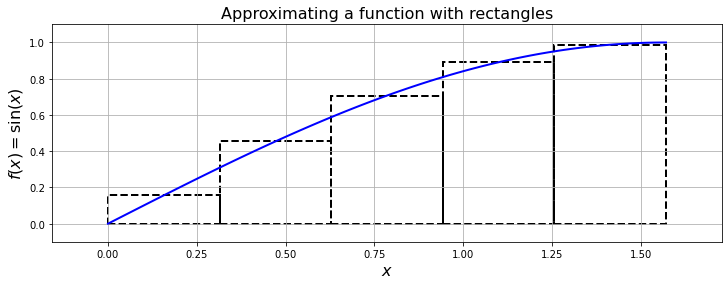

The sum of the areas of the rectangles is (I_M): 1.004124203954


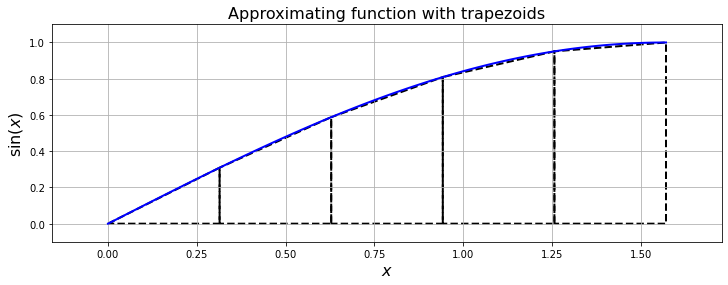

The sum of the areas of the trapezoids is (I_T): 0.991761768755


In [22]:
import matplotlib.pyplot as plt
import numpy
import scipy 

# this is a matplotlib function that allows us to easily plot rectangles
# which will be useful for visualising what the midpoint rule does
from matplotlib.patches import Rectangle


def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi/2, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$f(x)=\sin(x)$', fontsize=16)
ax1.set_title('Approximating a function with rectangles', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi/2, number_intervals+1)
I_M = 0.0
for i in range(number_intervals):
    ax1.add_patch(Rectangle((xi[i], 0.0), (xi[i+1] - xi[i]),
                            f((xi[i+1]+xi[i])/2), fill=False, ls='--', color='k', lw=2))
    I_M += f((xi[i+1]+xi[i])/2)*(xi[i+1] - xi[i])

# use an explicit show here to force the figure to appear before the following print.
plt.show()
print('The sum of the areas of the rectangles is (I_M): {:.12f}'.format(I_M))

# this is a matplotlib function that allows us to plot polygons
from matplotlib.patches import Polygon


def f(x):
    """The function we wish to integrate"""
    return np.sin(x)


# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi/2, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$\sin(x)$', fontsize=16)
ax1.set_title('Approximating function with trapezoids', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi/2, number_intervals+1)
I_T = 0.0
for i in range(number_intervals):
    ax1.add_patch(Polygon(np.array([[xi[i], 0], [xi[i], f(xi[i])], [
                  xi[i+1], f(xi[i+1])], [xi[i+1], 0]]), closed=True, fill=False, ls='--', color='k', lw=2))
    I_T += ((f(xi[i+1]) + f(xi[i]))/2)*(xi[i+1] - xi[i])

plt.show()
print('The sum of the areas of the trapezoids is (I_T): {:.12f}'.format(I_T))


For the "concave-down" (i.e. the first half of a sine wave) function we chose above, notice from the plot that the trapezoidal rule will **consistently underestimate** the area under the curve, as the line segments approximating the function are always under the concave function curve.

In contrast, the mid-point rule will have parts of each rectangle above and below the curve, hence to a certain extent the **errors will cancel** each other out. 

This is why, *for this particular example*, the errors in the mid-point rule turn out to be approximately half those in the trapezoidal rule.  

While this result turns out to be *generally* true for smooth functions, we can always come up with (counter) examples where the trapezoid rule will win (can you think of an example?).

Taylor series analysis can be used to formally construct upper bounds on the quadrature error for both methods. 

We know that the error when integrating constant and linear functions is zero for our two rules, so let's first consider an example of integrating a quadratic polynomial.

We know analytically that

$$\int_{0}^{1} x^{2}\,dx = \left.\frac{1}{3}x^3\right|_0^1=\frac {1}{3}.$$

Numerically, the midpoint rule on a single interval gives

\begin{equation}
I_M = 1 \left(\frac {1}{2}\right)^{2} = \frac {1}{4},
\end{equation}

while the trapezoidal rule gives

\begin{equation}
I_T = 1 \frac {0+1^{2}}{2} = \frac {1}{2}.
\end{equation}

The error for $I_M$ is therefore $1/3 - 1/4 = 1/12$, while the error for $I_T$ is $1/3 - 1/2 = -1/6$.

Therefore, the midpoint rule is twice as accurate as the trapezoid rule:

$$|E_M| = \frac{1}{2} |E_T|,$$

where $|E|$ indicates the error (the absolute value of the difference from the exact solution).

This is the case for this simple example, and we can see from the actual error values printed above that it also appears to be approximately true for the sine case (which is not a simple polynomial) as well.

We will use this knowledge to generate new more accurate rules below, but first let's sketch how you can go about a more rigorous analysis/estimation of errors.

In short, for our half sinewave, since we know that the area of half a sine wave is 1, the rectangle method overestimates it by about 0.4%, while the trapezoid method underestimates it for 0.9%. 

We notice that in this situation, the rectangle method **overestimates** while the trapezoid method **underestimates**.
We also notice that the underestimate of the trapezoid rule is about **twice** the overestimate of the rectangle method. 

So, well, could we combine twice the **overestimate** from the rectangle method and once the **underestimate** from the trapezoid method, and then divide everything by **3** since it's 2 parts rectangle and one part trapezoid rule, to obtain something more accurate?

<img src="images/SIMPSONS.png">

## VI.     Rule 3: Simpson's rule

Knowing the error estimates from the two rules explored so far opens up the potential for us to combine them in an appropriate manner to create a new quadrature rule, generally more accurate than either one separately. 

Suppose $I_S$ indicates an unknown, but more accurate, estimate of the integral over an interval.  

Then, as seen above, as $I_T$ has an error that is approximately $-2$ times the error in $I_M$, the following relation must hold approximately:


$$I_S - I_T \approx -2 \left ( I_S - I_M\right ).$$


This follows from the fact that $\,I - I_T \approx -2 \left ( I - I_M\right )$, provided that $I_S$ is closer to $I$ than either of the other two estimates.

Replacing this approximately equals sign with actual equality defines $I_S$ for us in terms of things we know. 

We can rearrange this to give an expression for $I_S$ that yields a more accurate estimate of the integral than either $I_M$ or $I_T$:

$$I_S := \frac{2}{3}I_M + \frac{1}{3}I_T.$$

We combined twice the **overestimate** from the rectangle method and once the **underestimate** from the trapezoid method, and then divide everything by **3** since it's 2 parts rectangle and one part trapezoid rule, to obtain something more accurate!

What we're doing here is using the fact that we know something about (the *leading order* behaviour of the) two errors, and we can therefore combine them to cancel this error to a certain extent.

This estimate will generally be more accurate than either $M$ or $T$ alone. The error won't actually be zero in general as we're only cancelling out the leading order term in the error, but a consequence is that we will be left with higher-degree terms in the error expansion of the new quadrature rule which should be smaller (at least in the asymptotic limit), and converge faster. 

The resulting quadrature method in this case is known as [Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule):

Let's expand the Simpsons rule by substituting in what we know about the Rectangle Rule and the Trapezoid Rule

\begin{align*}
I_S &:= \frac{2}{3}I_M + \frac{1}{3}I_T \\[5pt]
&= \frac{2}{3}  (b-a)f\left ( \frac{a+b}{2}\right ) + \frac{1}{3}(b-a)\frac{(f(a) + f(b))}{2} \\[5pt]
& = \frac{(b-a)}{6}\left( f \left ( a\right ) + 4f \left ( c\right ) + f\left ( b\right )\right),
\end{align*}

where $a$ and $b$ are the end points of an interval and $c = \left ( a+b\right )/2$ is the midpoint.


Note that an alternate derivation of the same rule involves fitting a *quadratic function* (i.e. $P_2(x)$ rather than the constant and linear approximations already considered) that interpolates the integral at the two end points of the interval, $a$ and $b$, as well as at the midpoint, $c = \left ( a+b\right )/2$, and calculating the integral under that polynomial approximation.

See the homework exercise, and note that we'll come back to this idea a bit later when we introduce the Newton-Cotes family of quadrature rules.

Let's plot what this method is doing and compute the integral for our sine case.

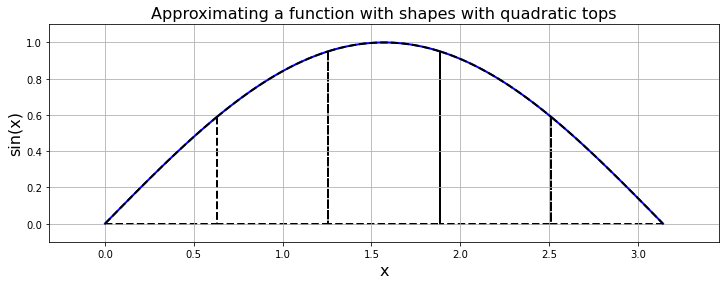

The Simpson's rule approximation (I_S): 2.000109517315


In [26]:
# this is a matplotlib function that allows us to plot polygons
# use this to plot the straight sides, and add an approximate
# quadratic at the top.
from matplotlib.patches import Polygon

def f(x):
    """The function we wish to integrate"""
    return np.sin(x)

# Get the value of pi from numpy and generate equally spaced values from 0 to pi.
x = np.linspace(0, np.pi, 100)
y = f(x)

# plot
fig = plt.figure(figsize=(12, 4))
ax1 = plt.subplot(111)
ax1.plot(x, y, 'b', lw=2)

ax1.margins(0.1)

# Label axis.
ax1.set_xlabel('x', fontsize=16)
ax1.set_ylabel('sin(x)', fontsize=16)
ax1.set_title('Approximating a function with shapes with quadratic tops', fontsize=16)

# Overlay a grid.
ax1.grid(True)

number_intervals = 5
xi = np.linspace(0, np.pi, number_intervals+1)

I_S = 0.0

for i in range(number_intervals):
    # use a non-closed Polygon to visualise the straight sides of each interval 
    ax1.add_patch(Polygon(np.array([[xi[i], f(xi[i])], [xi[i], 0], [xi[i+1], 0], [xi[i+1], f(xi[i+1])]]),
                          closed=False, fill=False, ls='--', color='k', lw=2))
    # add the quadratic top - fit a quadratic using numpy
    poly_coeff = np.polyfit((xi[i], (xi[i] + xi[i+1])/2.0, xi[i + 1]),
                            (f(xi[i]), f((xi[i] + xi[i+1])/2.0), f(xi[i+1])), 2)
    # plot the quadratic using 20 plotting points within the interval 
    ax1.plot(np.linspace(xi[i], xi[i+1], 20),
             f(np.linspace(xi[i], xi[i+1], 20)), ls='--', color='k', lw=2)
    # add in the area of the interval shape to our running total using Simpson's formula
    I_S += ((xi[i+1] - xi[i])/6.) * (f(xi[i]) + 4 *
                                     f((xi[i] + xi[i+1])/2.0) + f(xi[i+1]))

plt.show()
print("The Simpson's rule approximation (I_S): {:.12f}".format(I_S))

It looks like a much closer fit to the function:

<img src="http://upload.wikimedia.org/wikipedia/commons/5/50/Integration_simpson.png" width="600">

Let's make a function to test it out...

## <span style="color:blue">Exercise 3.3: Implementing Simpson's rule</span>

Complete an implementation of Simpson's rule and test it on our sine function.

In [ ]:
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    # Add your code here!
        

In [ ]:
print("The area found by direct integration = 2")
for i in (1, 2, 10, 100, 1000):
    area = simpsons_rule(0, np.pi, np.sin, i)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2)))

You should find:

`The area found by direct integration = 2`

`Area 1 rectangle(s) = 2.0944 (error=0.0943951)`

`Area 2 rectangle(s) = 2.00456 (error=0.00455975)`

`Area 20 rectangle(s) = 2 (error=4.23093e-07)`

`Area 200 rectangle(s) = 2 (error=4.228e-11)`

`Area 2000 rectangle(s) = 2 (error=2.22045e-15)`

For this simple function you should find far smaller errors, and which drop much more rapidly with smaller $h$ (or more sub-intervals).


## Observations


- The errors are lower than for the midpoint and trapezoidal rules, and the method converge more rapidly - i.e. the relative improvement only gets better for more subintervals.


- This expression now integrates up to cubics exactly (by construction), so it is of order 4 (as confirmed by the convergence plot above).

- <span style="color:red">For the Simpsons Rule, we have the degree of accuracy or precision being $3$ but the method is $4th$ order accurate, since if we halve the interval size the error goes down by a factor of $2^4 =16$!. Simpsons rule integrates to cubics exactly, so since it's integrating exactly, cubics cannot contribute to the error. Only the quartic(4th) contribute to the error, so it's 4th order accurate</span>


- We're getting down to errors close to machine precision now when we use 1000 subintervals. Remember: your average consumer grade hardware can only handle that many decimal points, and you will need some rather expensive hardware to have even higher levels of precisions. Continuing with 1000 subintervals is actually not helpful as the error that you will get stops decreasing as it is so small that your computer stops being able to discriminate it from 0 But remember we may well either have a relatively small number of data points, or want to minimise the number of function evaluations well below this relatively high number. This will mean that for problems with lots of variation, and/or in higher dimensions, that we still work to do in improving our quadrature methods.


- As was the case with our first Trapezoidal implementation, we are performing unnecessary function evaluations here; we can fix this issue through the implementation of a so-called *composite* version of the rule, which still gives the same result as your Simpson's rule, but makes it but easier for the computer. The Composite Simpsons Rule still does many evaluations, but fewer evaluations than your Standard Simpson's Rule. 

- You could always try to derive the Composite Simpson's Rule from the Simpsons Rule! I think this was covered in A Level Further Mathematics, at least when I was in high school. 

##   VII.     Rule 4: Composite Simpson's Rule


If we assume that our interval $[a,b]$ has been split up into $n$ intervals (or $n+1$ data points) we can save some function evaluations by writing Simpson's Rule in the following form (note here we do not introduce any additional midpoint function evaluations)

\begin{align*}
I_{S} 
& = \frac{\Delta x}{3}\left[ f \left ( x_0\right ) + 4f \left ( x_1\right ) + 2f\left ( x_2\right ) + 4f \left ( x_3\right ) + \cdots + 2 f \left ( x_{n-2}\right )  + 4 f \left ( x_{n-1}\right ) +  f \left ( x_{n}\right ) \right]\\[5pt]
& = \frac{\Delta x}{3}\left[ f \left ( x_0\right ) + 2\sum_{i=1}^{n/2 - 1} f\left(x_{2i}\right) + 4\sum_{i=1}^{n/2} f\left(x_{2i-1}\right)  +  f \left ( x_{n}\right ) \right].
\end{align*}

This is known as the [Composite Simpson's rule](http://en.wikipedia.org/wiki/Simpson%27s_rule#Composite_Simpson.27s_rule), 
or more precisely the *composite Simpson's 1/3 rule*.

This is the version of Simpson's rule implemented by Scipy [`scipy.interpolate.simps`](http://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simps.html).


Note that this way of formulating Simpson's rule (where we do not allow additional function evaluations at the midpoints of intervals - we assume we are only in a position to use the given data points) requires that $n$ be even.

This way of writing the composite form in the case of $n=2$ is equivalent to the formula over $[a,b]$ that introduced the additional midpoint location $c$.

In [ ]:
def simpsons_composite_rule(a, b, function, number_intervals=10):
    """Function to evaluate the composite Simpson's rule only using
    function evaluations at (number_intervals + 1) points.
    
    This implementation requires that the number of subintervals (number_intervals) be even
    """
    assert number_intervals % 2 == 0, "number_intervals is not even"

    interval_size = (b - a) / number_intervals
    # start with the two end member values
    I_cS2 = function(a) + function(b)

    # add in those terms with a coefficient of 4
    for i in range(1, number_intervals, 2):
        I_cS2 += 4 * function(a + i * interval_size)

    # and those terms with a coefficient of 2
    for i in range(2, number_intervals-1, 2):
        I_cS2 += 2 * function(a + i * interval_size)

    return I_cS2 * (interval_size / 3.0)

In [ ]:
print("The area found by direct integration = 2")
for i in (2, 10, 100, 1000):
    area = simpsons_composite_rule(0, np.pi, np.sin, i)
    print("Area %d rectangle(s) = %g (error=%g)"%(i, area, abs(area-2)))

This is a slight improvement for a simple function like $\sin$, but will be much more of an improvement for functions which oscillate more, in a relative sense compared to the size of our bins. 

## VIII.      Rule 5: Weddle's rule

We noted above that Simpson's rule is fourth-order accurate. <span style="color:red">For the Simpsons Rule, we have the degree of accuracy or precision being $3$ but the method is $4th$ order accurate, since if we halve the interval size the error goes down by a factor of $2^4 =16$!</span>

Suppose we take an approximation to $I$ using $n$ subintervals with Simpson's rule and call the result $I_S$, and then apply Simpson's rule with double the number of intervals ($2n$) and call the result $I_{S_2}$. 

Then we have two estimates for the integral where we expect $I_{S_2}$ to be approximately $2^4=16$ times more accurate than $S$. In particular, we expect the lowest (i.e. the leading) order error term in $I_{S_2}$ to be precisely one sixteenth that of $I_S$.<span style="color:red">For the Simpsons Rule, we have the degree of accuracy or precision being $3$ but the method is $4th$ order accurate, since if we halve the interval size the error goes down by a factor of $2^4 =16$!</span>

Similar to how we derived Simpson's rule by combining what we knew of the error for the midpoint and trapezoidal rules, with this knowledge we can combine the two estimates from Simpson's rule to derive an even more accurate estimate of $I$:

Basically,

You have your Simpsons rule, where you know it's 4th order accurate. 4th order accurate means that if the subinterval decreases by 2, then the error will also decrease by 16 times. You do the Simpsons Rule as usual, and you get that the area under the curve found through the Simpsons Rule is $I_S$. There is a certain error, let's call it $E_S$ in $I_S$

You have your Simpsons rule, but this time, you make the subintervals $2$ times smaller, thus decreasing the error by $16$ times, and you get the area under the curve $I_{S2}$. There is a certain error, let's call it $E_{S2}$ in $I_{S2}$.

Since for $I_{S2}$, compared to $I_{S}$, you made the intervals $2$ times samller, the error from $I_{S2}$, so $E_{S2}$, will be well 16 times smaller than the error from $I_S$, so $E_S$

We can therefore write the relationship between $E_S$ and $E_{S2}$ as

$$E_S \approx E_{S2} \times 16$$

Now, suppose we name our more accurate integral to be $I_W$. The difference between the more accurate integral and the Simpsons Rule integral $I_S$ is the error of the Simpsons Rule $E_S$, and I can write the relationship as

$$I_W = I_S + E_S$$

The difference between the more accurate integral and the Simpsons Rule integral with 2 times smaller subintervals $I_S2$ is the error of the Simpsons Rule $E_S2$, and I can write the relationship as

$$I_W = I_{S2} + E_{S2}$$

Performing Subsitution using the 3 equations above, I arrive at

$$I_W - I_S = 16 \left ( I_W - I_{S_2} \right ),$$

A bit of manipulation:

\begin{align*}
& \;\;\; I_W - I_S = 16 \left ( I_W - I_{S_2} \right ) \\[5pt]
\implies & \;\;\; I_W - I_S = 16 I_W - 16 I_{S_2} \\[5pt]
\implies & \;\;\; 15 I_W  = 16 I_{S_2} - I_S \\[5pt]
\implies & \;\;\; 15 I_W  = 15 I_{S_2} + (I_{S_2} - I_S) ,
\end{align*}

leads us to the expression

$$ I_W = I_{S_2} + \frac {\left (I_{S_2} - I_S \right )}{15}.$$

This is known as *Weddle's rule*, or the *extrapolated Simpson's rule* because it uses two different values for the interval size and *extrapolates* from these two to obtain an even more accurate result. 

Making a function for this rule is easy as we can just call our Simpson's rule functions with two values for the number of intervals.



## <span style="color:blue">Exercise 3.4: Implementing Weddle's rule</span>

Write a function which implements Weddle's rule using appropriate calls to the simpsons and simpsons_composite functions written above.

Ultimately you should be able to generate a comparison image that looks something like this:


<img src="./images/weddle_convergence.png" width=500x>

## Aside: (Richardson) extrapolation, Romberg integration and Newton-Cotes formula

Note that the above technique of using the same rule, but with different values for the interval size, $h$, to derive a more accurate estimate of the integral is an example of what is more generally called *Richardson extrapolation*.  

Performing this approach using the trapezoid rule as the starting point leads to what is termed *Romberg integration*.

Taking the idea behind Simpson's rule which fit a quadratic Lagrange interpolating polynomial to *equally spaced* points in the interval, end extending to any order Lagrange polynomial leads to the [*Newton-Cotes* family of quadrature rules](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas).

Note finally, that even wider families exist where the function being integrated is evaluated at non-equally-spaced points.

And of course for practical application these ideas need to be extended to more than one dimension.